# **E-COMMERCE CUSTOMER CHURN PREDICTION**

**Objective:**

The dataset contains various features related to customer behavior and characteristics in e-commerce, which can be used to predict customer churn.

The main task is to predict customer churn based on the given features.

This is a binary classification problem where the target variable is 'Churn'.

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Dataset**

In [ ]:
df = pd.read_csv('/content/data_ecommerce_customer_churn.csv')

**DataCard:**

1)Tenure: Tenure of a customer in the company

2)WarehouseToHome: Distance between the warehouse to the customer's home

3)NumberOfDeviceRegistered: Total number of devices registered to a particular customer

4)PreferedOrderCat: Preferred order category of a customer in the last month

5)SatisfactionScore: Satisfactory score of a customer on service

6)MaritalStatus: Marital status of a customer

7)NumberOfAddress: Total number of addresses added for a particular customer

8)Complaint: Whether any complaint has been raised in the last month

9)DaySinceLastOrder: Days since last order by customer

10)CashbackAmount: Average cashback in last month

11) Churn: Churn flag

**Inspecting first 5 rows**

In [ ]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


**Inspecting Shape of the dataframe**

In [ ]:
df.shape

(3941, 11)

**Checking the datatypes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


Object data types: PreferredOrderCat,MaritalStatus

**Checking the summary of Numerical columns**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,3747.0,10.081398,8.498864,0.0,2.0,9.00,16.00,61.00
WarehouseToHome,3772.0,15.650583,8.452301,5.0,9.0,14.00,21.00,127.00
NumberOfDeviceRegistered,3941.0,3.679269,1.013938,1.0,3.0,4.00,4.00,6.00
SatisfactionScore,3941.0,3.088302,1.381832,1.0,2.0,3.00,4.00,5.00
NumberOfAddress,3941.0,4.237757,2.626699,1.0,2.0,3.00,6.00,22.00
Complain,3941.0,0.282416,0.450232,0.0,0.0,0.00,1.00,1.00
DaySinceLastOrder,3728.0,4.531652,3.667648,0.0,2.0,3.00,7.00,46.00
CashbackAmount,3941.0,176.707419,48.791784,0.0,145.7,163.34,195.25,324.99
Churn,3941.0,0.171023,0.376576,0.0,0.0,0.00,0.00,1.00


**Checking for null values**

In [ ]:
df.isna().sum()

,0
Tenure,194
WarehouseToHome,169
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,213
CashbackAmount,0


There are null values in Tenure,WarehouseToHome and DaySinceLastOrder.We need to handle them.

**Visualizing the null values**

<Axes: >

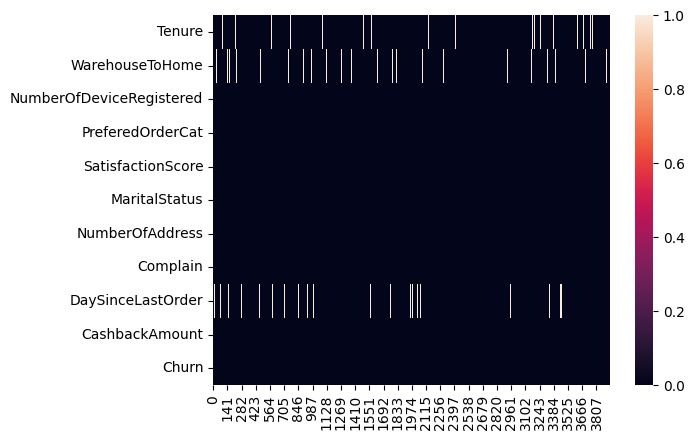

In [ ]:
sns.heatmap(df.isna().transpose())

**Removing null values**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Tenure,0
WarehouseToHome,0
NumberOfDeviceRegistered,0
PreferedOrderCat,0
SatisfactionScore,0
MaritalStatus,0
NumberOfAddress,0
Complain,0
DaySinceLastOrder,0
CashbackAmount,0


<Axes: >

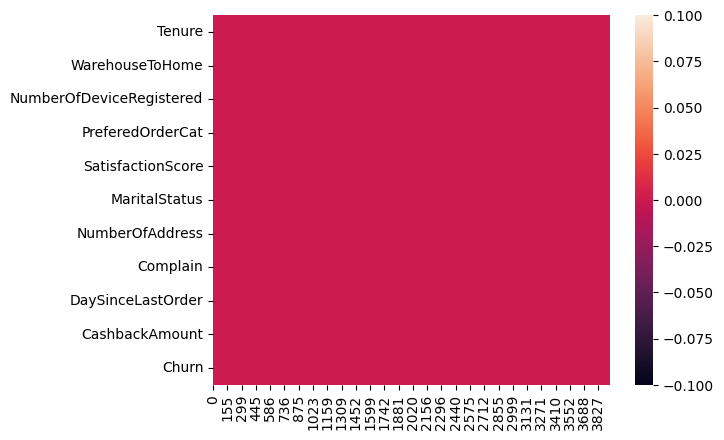

In [ ]:
sns.heatmap(df.isna().transpose())

# Examining Categorical Columns

<Axes: ylabel='NumberOfDeviceRegistered'>

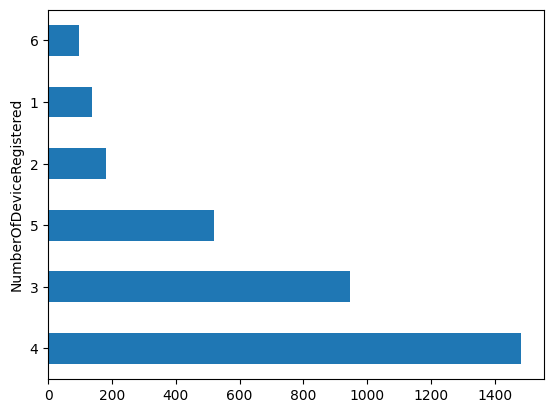

In [ ]:
df['NumberOfDeviceRegistered'].value_counts().plot(kind='barh')

<Axes: ylabel='PreferedOrderCat'>

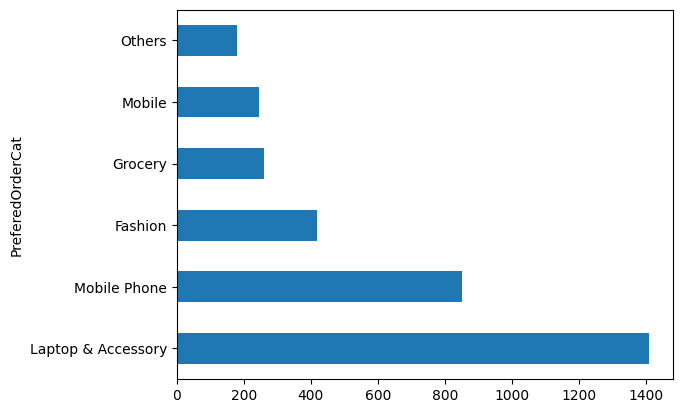

In [ ]:
df['PreferedOrderCat'].value_counts().plot(kind='barh')

<Axes: ylabel='SatisfactionScore'>

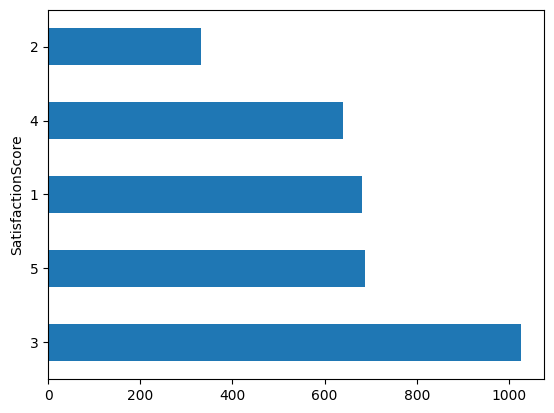

In [ ]:
df['SatisfactionScore'].value_counts().plot(kind='barh')

Text(0.5, 1.0, 'Marital Status')

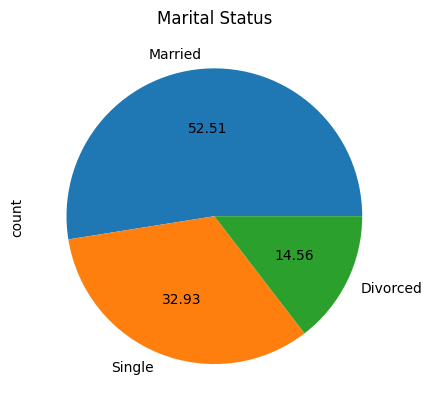

In [ ]:
df['MaritalStatus'].value_counts().plot(kind='pie',autopct='%1.2f')
plt.title('Marital Status')

Most of the customers are Married

<Axes: ylabel='NumberOfAddress'>

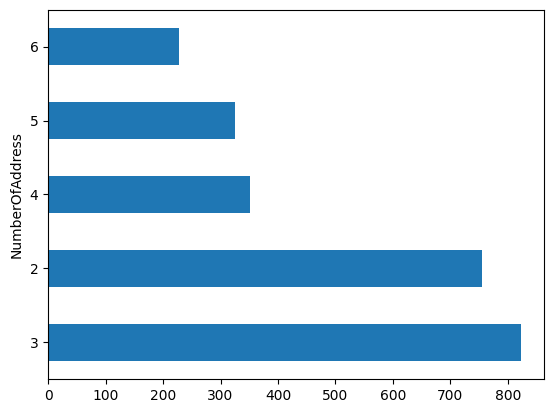

In [ ]:
df['NumberOfAddress'].value_counts().head().plot(kind='barh')

Text(0.5, 1.0, 'Complain')

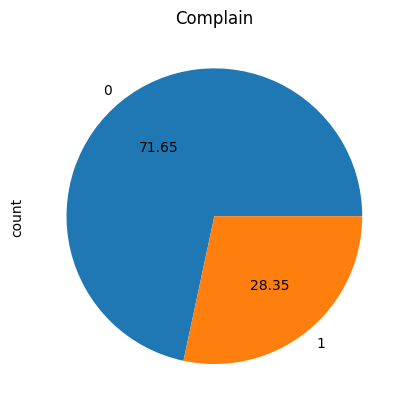

In [ ]:
df['Complain'].value_counts().plot(kind='pie',autopct='%1.2f')
plt.title('Complain')

The percentage of complains is 28.35%

<Axes: ylabel='DaySinceLastOrder'>

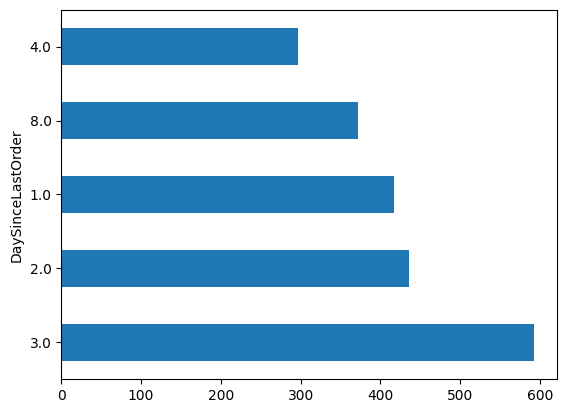

In [ ]:
df['DaySinceLastOrder'].value_counts().head().plot(kind='barh')

Text(0.5, 1.0, 'Churn rate')

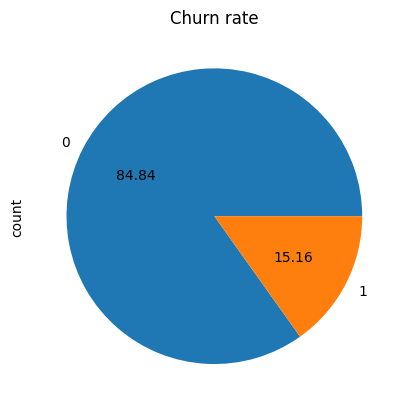

In [ ]:
df['Churn'].value_counts().plot(kind='pie',autopct='%1.2f')
plt.title('Churn rate')

The churn rate is less i.e. 15.16%

# Comparing other columns with Churn Rate

<Axes: xlabel='Churn', ylabel='Tenure'>

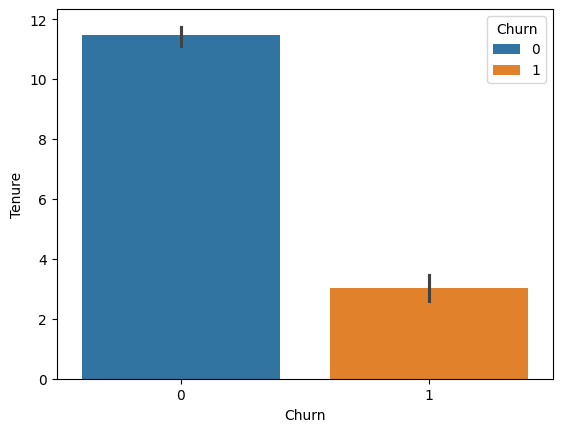

In [ ]:
sns.barplot(data=df,y='Tenure',x='Churn',hue='Churn')

<Axes: xlabel='Churn', ylabel='WarehouseToHome'>

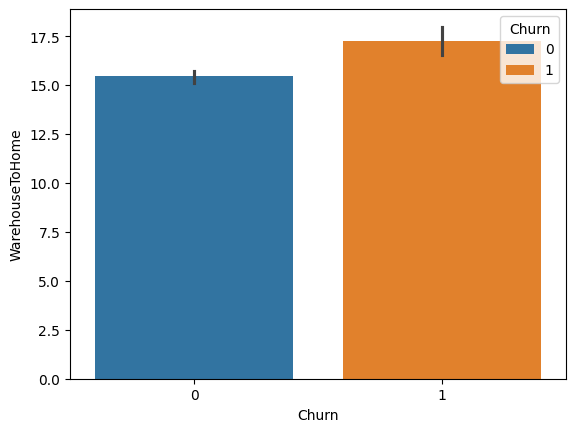

In [ ]:
sns.barplot(data=df,y='WarehouseToHome',x='Churn',hue='Churn')

<Axes: xlabel='Churn', ylabel='NumberOfDeviceRegistered'>

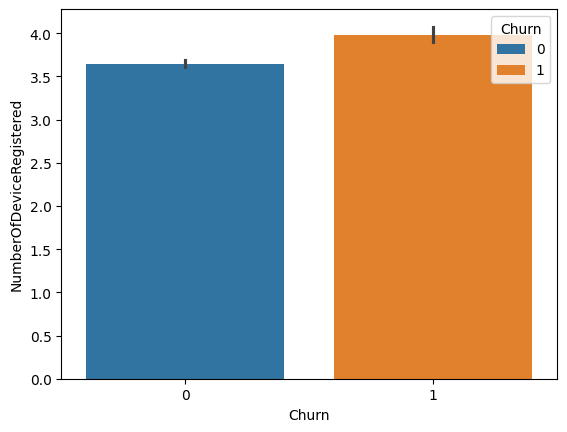

In [ ]:
sns.barplot(data=df,y='NumberOfDeviceRegistered',x='Churn',hue='Churn')

<Axes: xlabel='Churn', ylabel='SatisfactionScore'>

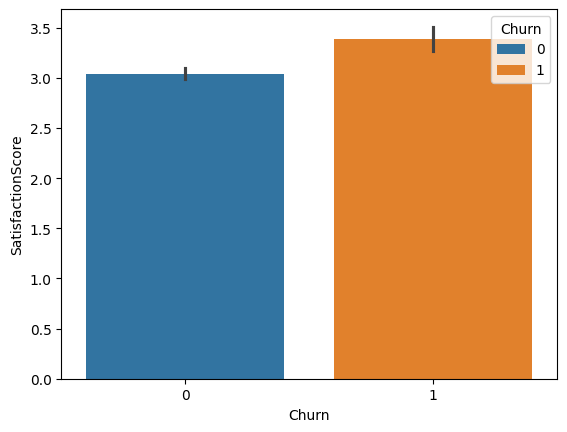

In [ ]:
sns.barplot(data=df,y='SatisfactionScore',x='Churn',hue='Churn')

<Axes: xlabel='Churn', ylabel='NumberOfAddress'>

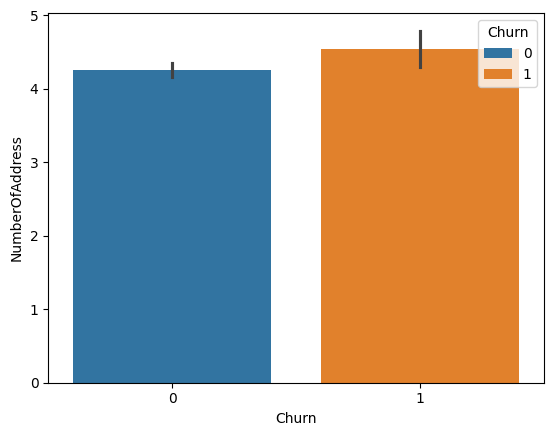

In [ ]:
sns.barplot(data=df,y='NumberOfAddress',x='Churn',hue='Churn')

<Axes: xlabel='Churn', ylabel='Complain'>

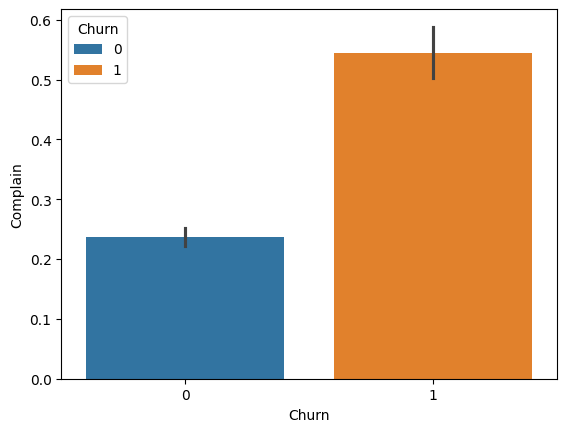

In [ ]:
sns.barplot(data=df,y='Complain',x='Churn',hue='Churn')

<Axes: xlabel='Churn', ylabel='DaySinceLastOrder'>

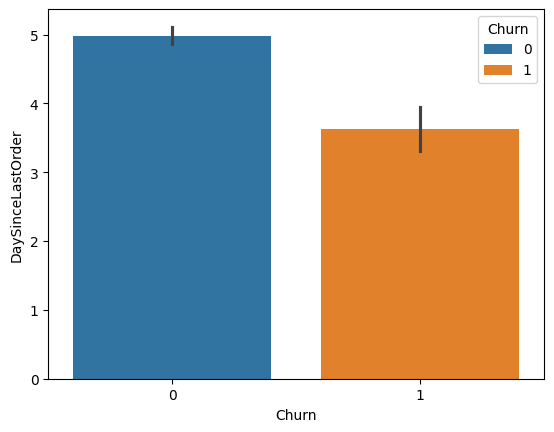

In [ ]:
sns.barplot(data=df,y='DaySinceLastOrder',x='Churn',hue='Churn')

<Axes: xlabel='Churn', ylabel='CashbackAmount'>

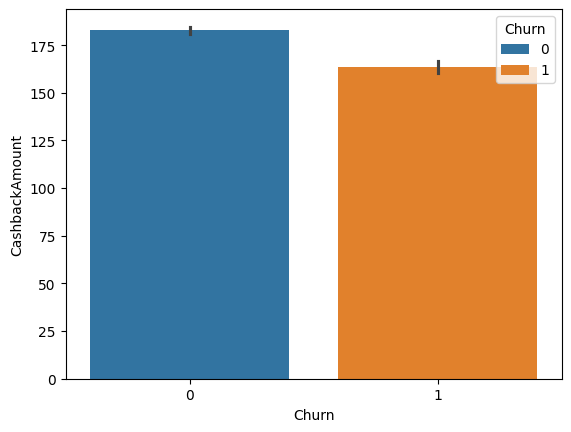

In [ ]:
sns.barplot(data=df,y='CashbackAmount',x='Churn',hue='Churn')

<Axes: xlabel='Churn', ylabel='MaritalStatus'>

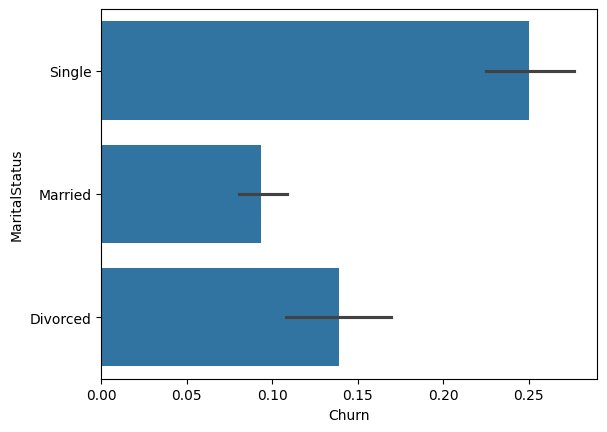

In [ ]:
sns.barplot(data=df,y='MaritalStatus',x='Churn')

<Axes: xlabel='Churn', ylabel='PreferedOrderCat'>

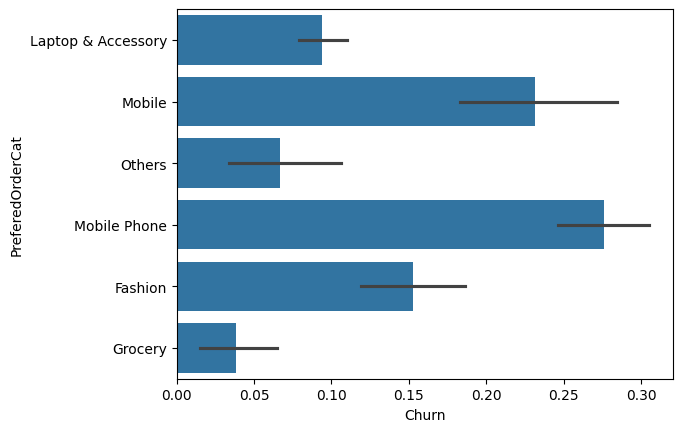

In [ ]:
sns.barplot(data=df,y='PreferedOrderCat',x='Churn')

<Axes: ylabel='Tenure'>

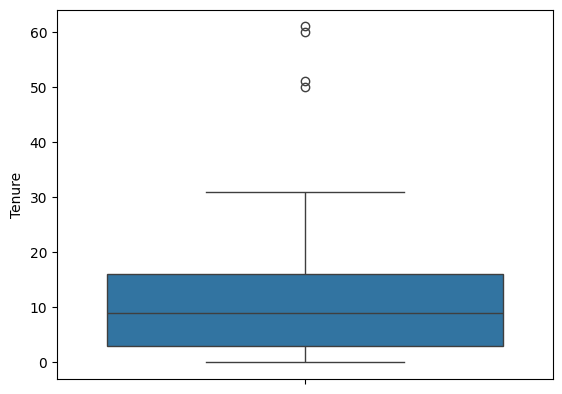

In [ ]:
sns.boxplot(data=df,y='Tenure')

<Axes: ylabel='WarehouseToHome'>

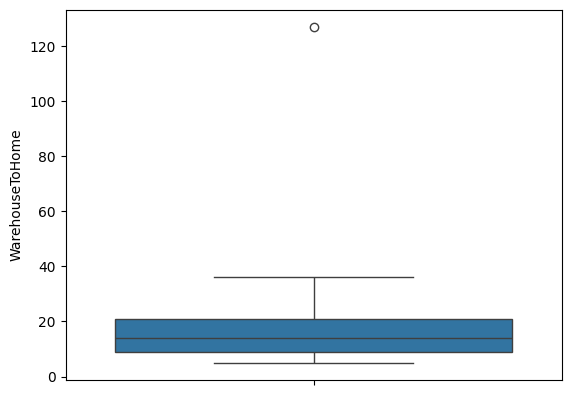

In [ ]:
sns.boxplot(data=df,y='WarehouseToHome')

<Axes: ylabel='NumberOfDeviceRegistered'>

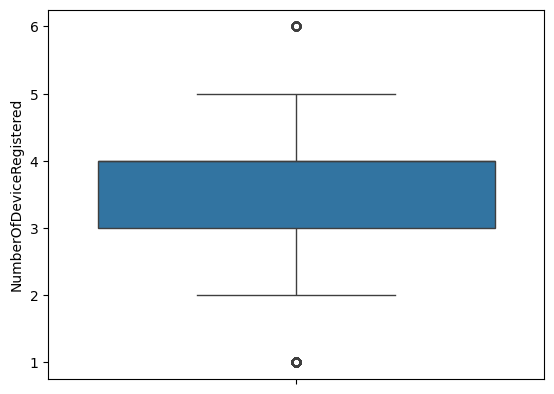

In [ ]:
sns.boxplot(data=df,y='NumberOfDeviceRegistered')

<Axes: ylabel='SatisfactionScore'>

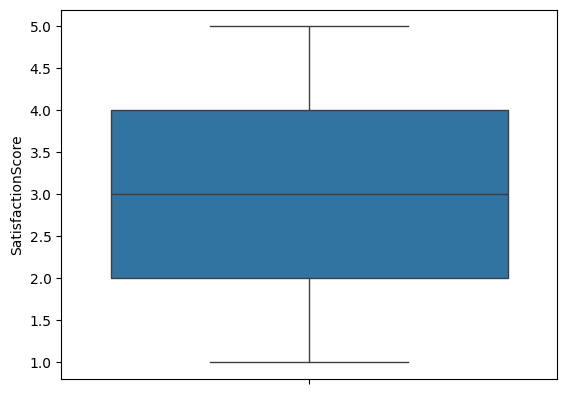

In [ ]:
sns.boxplot(data=df,y='SatisfactionScore')

<Axes: ylabel='NumberOfAddress'>

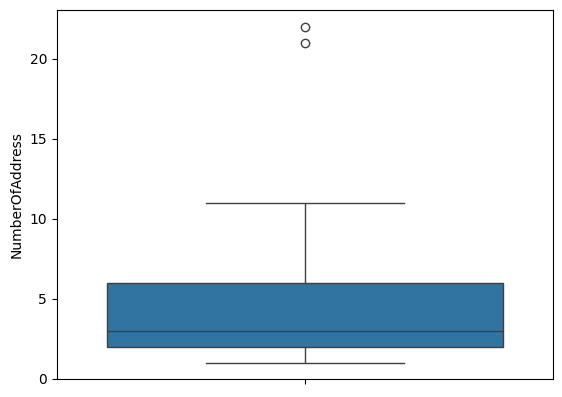

In [ ]:
sns.boxplot(data=df,y='NumberOfAddress')

<Axes: ylabel='DaySinceLastOrder'>

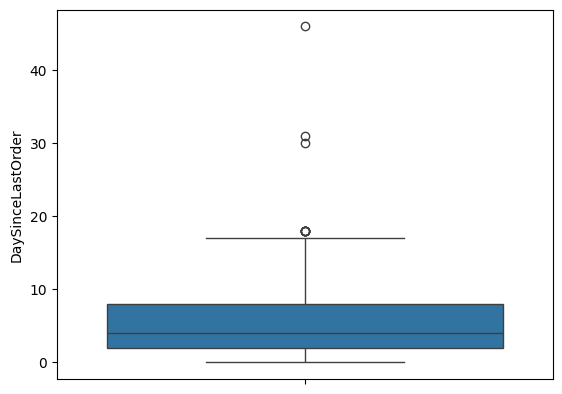

In [ ]:
sns.boxplot(data=df,y='DaySinceLastOrder')

<Axes: ylabel='CashbackAmount'>

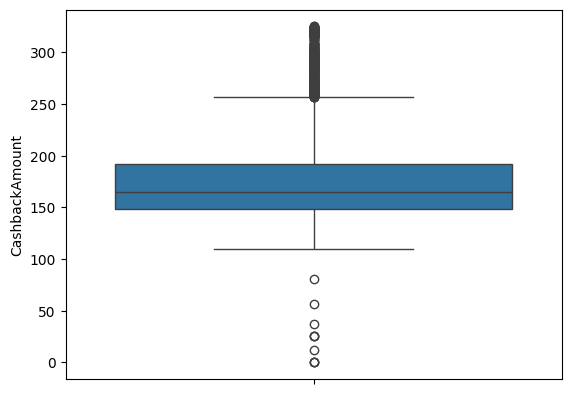

In [ ]:
sns.boxplot(data=df,y='CashbackAmount')

There are outliers in the data. But let us leave those outliers as they may not affect the data that much.

In [ ]:
num_cls = []
for i in df.columns:
  if df.dtypes[i] != 'object':
    num_cls+=[i]
print(num_cls)

['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'Churn']


<Axes: >

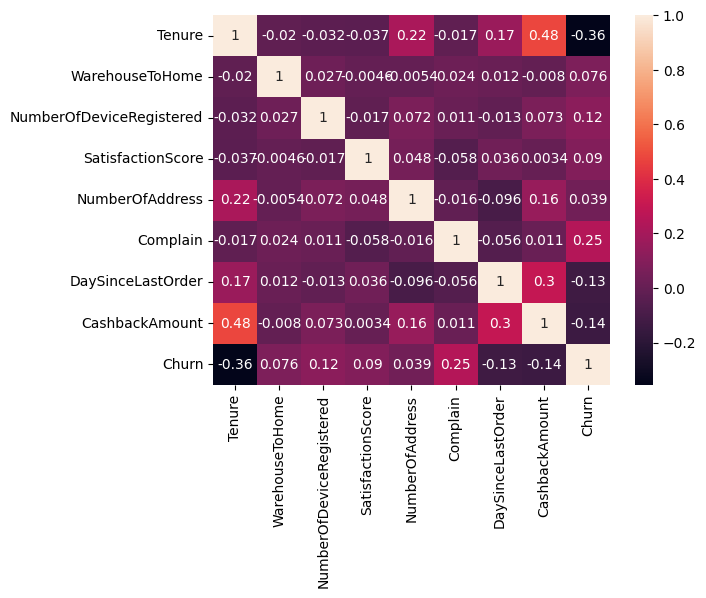

In [ ]:
sns.heatmap(data=df[num_cls].corr(),annot=True)

In [ ]:
cat_cls = []
for i in df.columns:
  if df.dtypes[i] == 'object':
    cat_cls+=[i]
print(cat_cls)

['PreferedOrderCat', 'MaritalStatus']


# Encoding Categorical Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['PreferedOrderCat'] = le.fit_transform(df['PreferedOrderCat'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])


# Feature Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()

target = 'Churn'
cols = [col for col in df.columns if col != target]
df[cols] = scalar.fit_transform(df[cols])

In [ ]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,0.461538,1.250000,0.0,0.0,0.0,1.0,-0.25,0.0,0.500000,-0.503693,0
1,-0.153846,0.916667,0.0,0.5,-1.0,0.0,-0.25,0.0,0.500000,-0.827562,0
2,1.384615,-0.083333,-1.0,0.0,-1.0,0.0,0.50,0.0,0.500000,0.078486,0
4,1.615385,0.083333,0.0,1.5,0.5,1.0,1.25,0.0,0.666667,3.624885,0
5,-0.153846,0.166667,0.0,1.0,-0.5,-1.0,-0.25,0.0,1.166667,-0.284626,0


# Train-Test-Split

In [ ]:
X = df.drop(columns='Churn')
y = df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (2692, 10)
X_test (673, 10)
y_train (2692,)
y_test (673,)


# Model Fitting

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
Lg = LogisticRegression()

Lg.fit(X_train,y_train)

y_pred = Lg.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report
accuracy = accuracy_score(y_test,y_pred)

print('Accuracy',accuracy*100)
print(classification_report(y_test, y_pred))

Accuracy 88.7072808320951
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       569
           1       0.75      0.40      0.53       104

    accuracy                           0.89       673
   macro avg       0.82      0.69      0.73       673
weighted avg       0.88      0.89      0.87       673



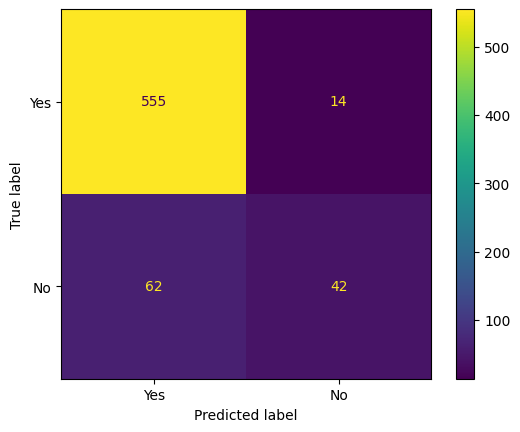

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

class_names = ['Yes', 'No']
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names)
plt.show()

**Decion Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

Accuracy: 0.9197622585438335
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       569
           1       0.75      0.73      0.74       104

    accuracy                           0.92       673
   macro avg       0.85      0.84      0.85       673
weighted avg       0.92      0.92      0.92       673



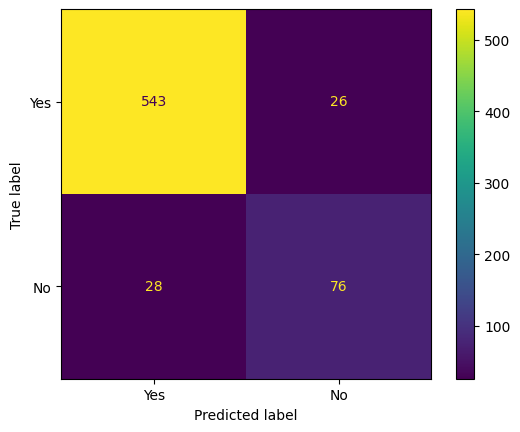

In [ ]:
cm = confusion_matrix(y_test, y_predict)

class_names = ['Yes', 'No']
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_predict, display_labels=class_names)
plt.show()

The accuracy for the Decision Tree Classifier is more (91%) when compared to Logistic Regression(88%), so the Decision Tree Classfier suits well for this problem.

 1. **Data Preprocessing**

•	Removed missing values (dropna).

•	Encoded categorical features using LabelEncoder for PreferredorderCategory and Marital Status.

•	Scaled numerical features using RobustScaler to reduce the impact of outliers.

 2. **Exploratory Data Analysis (EDA)**

•	Visualized distributions with countplots, pie charts and boxplots.

•	Visualizations highlighted the following:

a)only 15% of the customers opt to leave the platform/service.

b)customers who gave satisfaction score between 3 and 3.5 are likely to churn.

c)more complains means more chances of churn.

d)most preferred order category is mobile phone.

•	Target variable (churn) was found to be highly imbalanced, with far fewer churn.
3. **Modeling and Evaluation**
*•	Logistic Regression:*

a)	Achieved 88% accuracy.

b)	Robust despite the class imbalance and interpretable for stakeholders.

c)	Evaluated using accuracy, classification report (precision, recall, F1-score), and confusion matrix.

d)	Good interpretability, but slightly lower generalization performance than Decision Tree.

•	*Decision Tree Classifier:*

a)	Achieved 91% accuracy,the best performing model in the project.

b)	Evaluated using accuracy, classification report (precision, recall, F1-score), and confusion matrix.

4. **Conclusion**

•	 Decision Tree Classifier has outperformed the Logistic Regression in this case, offering better generalization and higher accuracy (91%).

•	Feature importance and performance metrics were used to identify the key drivers of promotions.
